In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import sys
sys.path.append('D:\\Compute Science\\Machine Learning\\论文\\项目\\FairSPL\\venv_torch')
sys.path.append('D:\\Compute Science\\Machine Learning\\论文\\项目\\FairSPL\\venv_torch\\lib\\site-packages')

In [2]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from dataset import fetch_data
from models.AdversarialDebiasing import AdversarialDebiasing
from eval import Evaluator
from utils import get_curriculum_stages
# from tmp.AdversarialDebiasing_copied2_before_lr import AdversarialDebiasing

In [3]:
data = fetch_data("adult")
print("data.x_train.shape: ", data.x_train.shape)
print("data.x_test.shape: ", data.x_test.shape)
origin_evaluator, train_evaluator, test_evaluator = Evaluator(data.s_train, "origin"), Evaluator(data.s_train,
                                                                                                 "train"), Evaluator(
    data.s_test, "test")
if data.s_val is not None:
    val_evaluator = Evaluator(data.s_val, "val")

n_features, n_classes, n_groups = data.x_train.shape[1], len(np.unique(data.y_train)), len(np.unique(data.s_train))
if n_classes == 2:
    n_classes = 1
if n_groups == 2:
    n_groups = 1

print("========== before train ==========")
origin_res = origin_evaluator(data.y_train, no_train=True)

Loading Adult dataset..
train_val_df.shape:  (32561, 15)
test_df.shape:  (12661, 15)


E:\Environment\python\python3.7.4\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Dataset statistic - #total: 45222; #train: 26049; #val.: 6512; #test: 12661; #dim.: 102

data.x_train.shape:  (26049, 102)
data.x_test.shape:  (12661, 102)
========== before train ==========
========== Results on origin ==========
Grp. 0 - #instance: 8460; #pos : 954
Grp. 1 - #instance: 17589; #pos : 5496
Demographic parity: 0.199702; Equal opportunity: 0.000000; Average odds difference: 0.000000


In [4]:
clf_no_debias = AdversarialDebiasing(n_features, n_classes, n_groups, num_epochs=500, batch_size=512,
                     classifier_num_hidden_units=512, random_state=42, debias=False)

loss_list_no_debias, val_list_no_debias, train_info_no_debias, val_info_no_debias = clf_no_debias.fit(data.x_train, data.y_train, data.s_train, 
                                                    early_stopping=True, validation_set=[data.x_val, data.y_val, data.s_val])



Classifier Training Epoch:   3%|▎         | 14/500 [00:21<11:24,  1.41s/it, acc=0.846, loss=1.7] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   3%|▎         | 16/500 [00:23<10:40,  1.32s/it, acc=0.824, loss=1.44]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   4%|▎         | 18/500 [00:25<10:19,  1.29s/it, acc=0.832, loss=1.49]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   5%|▍         | 24/500 [00:33<10:03,  1.27s/it, acc=0.828, loss=1.14] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   5%|▌         | 25/500 [00:34<10:06,  1.28s/it, acc=0.822, loss=1.64] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:   7%|▋         | 34/500 [00:45<09:13,  1.19s/it, acc=0.842, loss=0.993]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   7%|▋         | 35/500 [00:46<09:03,  1.17s/it, acc=0.855, loss=0.969]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:   7%|▋         | 36/500 [00:47<09:04,  1.17s/it, acc=0.852, loss=0.95] 

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:   8%|▊         | 41/500 [00:53<09:32,  1.25s/it, acc=0.852, loss=0.743]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  10%|█         | 51/500 [01:06<10:42,  1.43s/it, acc=0.809, loss=2.21] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  10%|█         | 52/500 [01:07<10:32,  1.41s/it, acc=0.814, loss=2.2]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  11%|█         | 53/500 [01:08<10:21,  1.39s/it, acc=0.783, loss=1.95] 

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  11%|█         | 54/500 [01:10<10:27,  1.41s/it, acc=0.834, loss=1.81] 

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  11%|█         | 55/500 [01:11<10:14,  1.38s/it, acc=0.812, loss=1.8]  

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  11%|█         | 56/500 [01:13<10:05,  1.36s/it, acc=0.809, loss=2]    

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  11%|█▏        | 57/500 [01:14<09:47,  1.33s/it, acc=0.805, loss=1.75] 

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  12%|█▏        | 58/500 [01:15<09:42,  1.32s/it, acc=0.809, loss=1.75] 

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  12%|█▏        | 59/500 [01:16<09:40,  1.32s/it, acc=0.828, loss=1.8]  

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  12%|█▏        | 60/500 [01:18<09:31,  1.30s/it, acc=0.875, loss=0.576]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  12%|█▏        | 61/500 [01:19<09:38,  1.32s/it, acc=0.807, loss=1.54] 

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  12%|█▏        | 62/500 [01:20<09:32,  1.31s/it, acc=0.816, loss=1.37] 

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  12%|█▏        | 62/500 [01:21<09:32,  1.31s/it, acc=0.875, loss=0.511]

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  13%|█▎        | 63/500 [01:23<09:35,  1.32s/it, acc=0.859, loss=0.628]

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  13%|█▎        | 64/500 [01:24<09:19,  1.28s/it, acc=0.859, loss=0.611]

EarlyStopping counter: 15 out of 10


Classifier Training Epoch:  13%|█▎        | 65/500 [01:25<09:16,  1.28s/it, acc=0.855, loss=0.678]

EarlyStopping counter: 16 out of 10


Classifier Training Epoch:  13%|█▎        | 66/500 [01:27<09:09,  1.27s/it, acc=0.873, loss=0.478]

EarlyStopping counter: 17 out of 10


Classifier Training Epoch:  13%|█▎        | 67/500 [01:28<09:18,  1.29s/it, acc=0.873, loss=0.449]

EarlyStopping counter: 18 out of 10


Classifier Training Epoch:  14%|█▎        | 68/500 [01:29<09:34,  1.33s/it, acc=0.869, loss=0.598]

EarlyStopping counter: 19 out of 10


Classifier Training Epoch:  14%|█▍        | 69/500 [01:30<09:32,  1.33s/it, acc=0.859, loss=0.558]

EarlyStopping counter: 20 out of 10


Classifier Training Epoch:  14%|█▍        | 70/500 [01:32<09:17,  1.30s/it, acc=0.867, loss=0.502]

EarlyStopping counter: 21 out of 10


Classifier Training Epoch:  14%|█▍        | 71/500 [01:33<09:12,  1.29s/it, acc=0.865, loss=0.504]

EarlyStopping counter: 22 out of 10


Classifier Training Epoch:  14%|█▍        | 72/500 [01:34<09:04,  1.27s/it, acc=0.895, loss=0.465]

EarlyStopping counter: 23 out of 10


Classifier Training Epoch:  15%|█▍        | 73/500 [01:35<08:54,  1.25s/it, acc=0.857, loss=0.484]

EarlyStopping counter: 24 out of 10


Classifier Training Epoch:  15%|█▍        | 74/500 [01:37<08:55,  1.26s/it, acc=0.867, loss=0.507]

EarlyStopping counter: 25 out of 10


Classifier Training Epoch:  15%|█▌        | 75/500 [01:38<08:50,  1.25s/it, acc=0.885, loss=0.481]

EarlyStopping counter: 26 out of 10


Classifier Training Epoch:  15%|█▌        | 77/500 [01:40<08:54,  1.26s/it, acc=0.857, loss=0.723]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  16%|█▌        | 79/500 [01:43<08:51,  1.26s/it, acc=0.857, loss=0.674]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  16%|█▌        | 81/500 [01:45<08:38,  1.24s/it, acc=0.859, loss=0.419]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  16%|█▋        | 82/500 [01:46<08:37,  1.24s/it, acc=0.869, loss=0.365]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  17%|█▋        | 85/500 [01:50<08:39,  1.25s/it, acc=0.865, loss=0.406]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  18%|█▊        | 88/500 [01:54<08:20,  1.22s/it, acc=0.869, loss=0.382]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  18%|█▊        | 89/500 [01:55<08:19,  1.22s/it, acc=0.869, loss=0.374]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  18%|█▊        | 91/500 [01:57<08:20,  1.22s/it, acc=0.869, loss=0.401]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  18%|█▊        | 92/500 [01:59<08:27,  1.24s/it, acc=0.848, loss=0.385]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  20%|██        | 101/500 [02:09<09:06,  1.37s/it, acc=0.807, loss=1.17] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  20%|██        | 102/500 [02:11<09:12,  1.39s/it, acc=0.832, loss=0.933]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  21%|██        | 103/500 [02:12<09:24,  1.42s/it, acc=0.812, loss=0.904]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  21%|██        | 104/500 [02:14<09:16,  1.40s/it, acc=0.799, loss=0.938]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  21%|██        | 105/500 [02:15<08:55,  1.35s/it, acc=0.801, loss=1.08] 

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  21%|██        | 106/500 [02:16<08:47,  1.34s/it, acc=0.822, loss=0.913]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  21%|██▏       | 107/500 [02:18<08:34,  1.31s/it, acc=0.848, loss=0.721]

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  22%|██▏       | 108/500 [02:19<08:39,  1.33s/it, acc=0.895, loss=0.302]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  22%|██▏       | 109/500 [02:20<08:19,  1.28s/it, acc=0.85, loss=0.748] 

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  22%|██▏       | 110/500 [02:21<08:14,  1.27s/it, acc=0.826, loss=0.753]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  22%|██▏       | 111/500 [02:22<07:58,  1.23s/it, acc=0.842, loss=0.694]

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  22%|██▏       | 112/500 [02:24<08:08,  1.26s/it, acc=0.891, loss=0.284]

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  23%|██▎       | 113/500 [02:25<08:10,  1.27s/it, acc=0.818, loss=0.81] 

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  23%|██▎       | 113/500 [02:26<08:10,  1.27s/it, acc=0.869, loss=0.358]

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  23%|██▎       | 114/500 [02:27<08:08,  1.27s/it, acc=0.873, loss=0.352]

EarlyStopping counter: 15 out of 10


Classifier Training Epoch:  23%|██▎       | 115/500 [02:29<08:05,  1.26s/it, acc=0.867, loss=0.373]

EarlyStopping counter: 16 out of 10


Classifier Training Epoch:  23%|██▎       | 116/500 [02:30<08:25,  1.32s/it, acc=0.867, loss=0.362]

EarlyStopping counter: 17 out of 10


Classifier Training Epoch:  23%|██▎       | 117/500 [02:31<08:20,  1.31s/it, acc=0.873, loss=0.35] 

EarlyStopping counter: 18 out of 10


Classifier Training Epoch:  24%|██▍       | 121/500 [02:36<08:18,  1.32s/it, acc=0.873, loss=0.331]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  25%|██▌       | 127/500 [02:44<07:58,  1.28s/it, acc=0.869, loss=0.435]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  26%|██▌       | 129/500 [02:46<07:42,  1.25s/it, acc=0.883, loss=0.384]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  26%|██▌       | 130/500 [02:48<07:42,  1.25s/it, acc=0.893, loss=0.351]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  26%|██▌       | 131/500 [02:49<07:40,  1.25s/it, acc=0.863, loss=0.255]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  27%|██▋       | 134/500 [02:52<07:31,  1.23s/it, acc=0.91, loss=0.274] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  27%|██▋       | 135/500 [02:54<07:27,  1.22s/it, acc=0.877, loss=0.334]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  27%|██▋       | 136/500 [02:55<07:28,  1.23s/it, acc=0.871, loss=0.249]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  27%|██▋       | 137/500 [02:56<07:26,  1.23s/it, acc=0.875, loss=0.246]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  28%|██▊       | 141/500 [03:01<07:22,  1.23s/it, acc=0.891, loss=0.277]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  29%|██▉       | 144/500 [03:05<07:14,  1.22s/it, acc=0.883, loss=0.246]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  29%|██▉       | 147/500 [03:08<07:08,  1.21s/it, acc=0.912, loss=0.239]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  30%|███       | 151/500 [03:13<07:41,  1.32s/it, acc=0.816, loss=0.547]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  30%|███       | 152/500 [03:14<07:57,  1.37s/it, acc=0.852, loss=0.476]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  31%|███       | 153/500 [03:16<07:58,  1.38s/it, acc=0.803, loss=0.693]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  31%|███       | 154/500 [03:17<08:09,  1.42s/it, acc=0.832, loss=0.513]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  31%|███       | 155/500 [03:19<08:31,  1.48s/it, acc=0.838, loss=0.563]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  31%|███       | 156/500 [03:20<08:07,  1.42s/it, acc=0.859, loss=0.476]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  31%|███▏      | 157/500 [03:22<07:55,  1.39s/it, acc=0.846, loss=0.466]

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  32%|███▏      | 158/500 [03:23<07:48,  1.37s/it, acc=0.832, loss=0.478]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  32%|███▏      | 159/500 [03:24<07:48,  1.37s/it, acc=0.795, loss=0.7]  

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  32%|███▏      | 160/500 [03:25<07:28,  1.32s/it, acc=0.838, loss=0.398]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  32%|███▏      | 161/500 [03:27<07:24,  1.31s/it, acc=0.904, loss=0.222]

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  32%|███▏      | 161/500 [03:28<07:24,  1.31s/it, acc=0.877, loss=0.261]

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  33%|███▎      | 164/500 [03:32<07:31,  1.34s/it, acc=0.881, loss=0.249]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  33%|███▎      | 165/500 [03:33<07:25,  1.33s/it, acc=0.896, loss=0.26] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  34%|███▍      | 172/500 [03:42<07:12,  1.32s/it, acc=0.895, loss=0.23] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  35%|███▍      | 174/500 [03:45<07:03,  1.30s/it, acc=0.891, loss=0.231]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  35%|███▌      | 176/500 [03:48<07:25,  1.37s/it, acc=0.904, loss=0.23] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  36%|███▌      | 178/500 [03:50<07:09,  1.33s/it, acc=0.904, loss=0.228]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  36%|███▌      | 179/500 [03:51<06:57,  1.30s/it, acc=0.906, loss=0.226]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  36%|███▌      | 181/500 [03:54<07:00,  1.32s/it, acc=0.895, loss=0.236]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  37%|███▋      | 184/500 [03:58<06:37,  1.26s/it, acc=0.91, loss=0.266] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  37%|███▋      | 185/500 [03:59<06:34,  1.25s/it, acc=0.912, loss=0.262]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  38%|███▊      | 188/500 [04:03<06:25,  1.23s/it, acc=0.879, loss=0.252]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  39%|███▊      | 193/500 [04:09<06:15,  1.22s/it, acc=0.924, loss=0.221]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  39%|███▉      | 196/500 [04:12<06:18,  1.25s/it, acc=0.889, loss=0.225]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  40%|████      | 201/500 [04:19<06:41,  1.34s/it, acc=0.838, loss=0.395]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  40%|████      | 202/500 [04:20<06:44,  1.36s/it, acc=0.867, loss=0.335]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  41%|████      | 203/500 [04:21<06:56,  1.40s/it, acc=0.861, loss=0.316]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  41%|████      | 204/500 [04:23<07:09,  1.45s/it, acc=0.838, loss=0.39] 

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  41%|████      | 205/500 [04:24<06:58,  1.42s/it, acc=0.869, loss=0.324]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  41%|████      | 206/500 [04:26<06:58,  1.42s/it, acc=0.855, loss=0.337]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  41%|████▏     | 207/500 [04:27<06:46,  1.39s/it, acc=0.871, loss=0.32] 

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  42%|████▏     | 208/500 [04:28<06:24,  1.32s/it, acc=0.869, loss=0.341]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  42%|████▏     | 209/500 [04:30<06:38,  1.37s/it, acc=0.863, loss=0.364]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  42%|████▏     | 210/500 [04:31<06:26,  1.33s/it, acc=0.855, loss=0.354]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  42%|████▏     | 212/500 [04:33<06:09,  1.28s/it, acc=0.871, loss=0.282]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  43%|████▎     | 215/500 [04:38<05:55,  1.25s/it, acc=0.885, loss=0.249]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  44%|████▎     | 218/500 [04:42<05:50,  1.24s/it, acc=0.893, loss=0.237]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  44%|████▍     | 219/500 [04:43<05:55,  1.27s/it, acc=0.895, loss=0.237]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  44%|████▍     | 222/500 [04:47<05:48,  1.25s/it, acc=0.898, loss=0.24] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  45%|████▍     | 224/500 [04:49<05:43,  1.25s/it, acc=0.9, loss=0.222]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  45%|████▌     | 225/500 [04:51<05:51,  1.28s/it, acc=0.885, loss=0.286]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  45%|████▌     | 227/500 [04:53<05:46,  1.27s/it, acc=0.883, loss=0.281]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  46%|████▌     | 229/500 [04:56<05:38,  1.25s/it, acc=0.906, loss=0.207]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  46%|████▌     | 230/500 [04:57<05:40,  1.26s/it, acc=0.904, loss=0.207]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  46%|████▋     | 232/500 [04:59<05:36,  1.26s/it, acc=0.898, loss=0.221]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  47%|████▋     | 233/500 [05:01<05:42,  1.28s/it, acc=0.906, loss=0.217]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  47%|████▋     | 235/500 [05:03<05:35,  1.26s/it, acc=0.918, loss=0.211]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  47%|████▋     | 236/500 [05:04<05:30,  1.25s/it, acc=0.92, loss=0.208] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  47%|████▋     | 237/500 [05:06<05:29,  1.25s/it, acc=0.9, loss=0.224]  

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  48%|████▊     | 240/500 [05:09<05:14,  1.21s/it, acc=0.893, loss=0.224]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  48%|████▊     | 241/500 [05:10<05:16,  1.22s/it, acc=0.883, loss=0.24] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  48%|████▊     | 242/500 [05:12<05:21,  1.25s/it, acc=0.898, loss=0.215]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  50%|█████     | 250/500 [05:21<05:43,  1.37s/it, acc=0.879, loss=0.28] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  50%|█████     | 251/500 [05:23<05:36,  1.35s/it, acc=0.857, loss=0.318]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  50%|█████     | 252/500 [05:24<05:35,  1.35s/it, acc=0.84, loss=0.37]  

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  51%|█████     | 253/500 [05:25<05:22,  1.31s/it, acc=0.846, loss=0.384]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  51%|█████     | 254/500 [05:27<05:34,  1.36s/it, acc=0.869, loss=0.281]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  51%|█████     | 255/500 [05:28<05:40,  1.39s/it, acc=0.863, loss=0.277]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  51%|█████     | 256/500 [05:30<05:57,  1.47s/it, acc=0.871, loss=0.303]

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  51%|█████▏    | 257/500 [05:31<05:49,  1.44s/it, acc=0.852, loss=0.368]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  52%|█████▏    | 258/500 [05:33<05:47,  1.44s/it, acc=0.861, loss=0.279]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  52%|█████▏    | 259/500 [05:34<05:41,  1.42s/it, acc=0.818, loss=0.367]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  52%|█████▏    | 260/500 [05:35<05:33,  1.39s/it, acc=0.877, loss=0.3]  

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  53%|█████▎    | 263/500 [05:41<05:21,  1.36s/it, acc=0.9, loss=0.243]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  54%|█████▍    | 270/500 [05:50<04:53,  1.28s/it, acc=0.904, loss=0.234]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  55%|█████▍    | 273/500 [05:53<04:52,  1.29s/it, acc=0.91, loss=0.201] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  55%|█████▌    | 276/500 [05:57<04:37,  1.24s/it, acc=0.9, loss=0.218]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  55%|█████▌    | 277/500 [05:58<04:37,  1.24s/it, acc=0.896, loss=0.236]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  56%|█████▌    | 278/500 [05:59<04:40,  1.26s/it, acc=0.898, loss=0.216]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  56%|█████▌    | 279/500 [06:01<04:41,  1.27s/it, acc=0.9, loss=0.236]  

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  56%|█████▌    | 280/500 [06:02<04:39,  1.27s/it, acc=0.902, loss=0.202]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  57%|█████▋    | 283/500 [06:06<04:28,  1.24s/it, acc=0.9, loss=0.219]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  57%|█████▋    | 284/500 [06:07<04:26,  1.24s/it, acc=0.91, loss=0.211] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  57%|█████▋    | 286/500 [06:09<04:22,  1.23s/it, acc=0.916, loss=0.204]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  57%|█████▋    | 287/500 [06:11<04:29,  1.26s/it, acc=0.9, loss=0.219]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  58%|█████▊    | 288/500 [06:12<04:29,  1.27s/it, acc=0.883, loss=0.239]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  58%|█████▊    | 292/500 [06:18<04:58,  1.43s/it, acc=0.895, loss=0.221]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  59%|█████▉    | 294/500 [06:20<04:47,  1.40s/it, acc=0.895, loss=0.219]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  59%|█████▉    | 295/500 [06:21<04:39,  1.36s/it, acc=0.924, loss=0.202]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  59%|█████▉    | 296/500 [06:23<04:33,  1.34s/it, acc=0.926, loss=0.2]  

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  59%|█████▉    | 297/500 [06:24<04:20,  1.29s/it, acc=0.893, loss=0.216]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  60%|█████▉    | 298/500 [06:26<04:19,  1.28s/it, acc=0.895, loss=0.223]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  60%|█████▉    | 299/500 [06:27<04:53,  1.46s/it, acc=0.938, loss=0.177]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  60%|██████    | 300/500 [06:29<05:27,  1.64s/it, acc=0.885, loss=0.265]

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  60%|██████    | 301/500 [06:30<05:17,  1.60s/it, acc=0.902, loss=0.261]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  60%|██████    | 302/500 [06:31<05:00,  1.52s/it, acc=0.877, loss=0.279]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  61%|██████    | 303/500 [06:33<04:59,  1.52s/it, acc=0.852, loss=0.352]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  61%|██████    | 304/500 [06:34<04:52,  1.49s/it, acc=0.844, loss=0.333]

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  61%|██████    | 305/500 [06:36<04:45,  1.47s/it, acc=0.857, loss=0.297]

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  61%|██████    | 306/500 [06:37<04:41,  1.45s/it, acc=0.857, loss=0.293]

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  61%|██████▏   | 307/500 [06:38<04:33,  1.42s/it, acc=0.875, loss=0.289]

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  62%|██████▏   | 308/500 [06:40<04:26,  1.39s/it, acc=0.875, loss=0.273]

EarlyStopping counter: 15 out of 10


Classifier Training Epoch:  62%|██████▏   | 309/500 [06:41<04:17,  1.35s/it, acc=0.854, loss=0.324]

EarlyStopping counter: 16 out of 10


Classifier Training Epoch:  62%|██████▏   | 310/500 [06:42<04:15,  1.34s/it, acc=0.879, loss=0.281]

EarlyStopping counter: 17 out of 10


Classifier Training Epoch:  62%|██████▏   | 310/500 [06:44<04:15,  1.34s/it, acc=0.906, loss=0.219]

EarlyStopping counter: 18 out of 10


Classifier Training Epoch:  62%|██████▏   | 311/500 [06:45<04:11,  1.33s/it, acc=0.898, loss=0.202]

EarlyStopping counter: 19 out of 10


Classifier Training Epoch:  62%|██████▏   | 312/500 [06:46<04:12,  1.34s/it, acc=0.902, loss=0.201]

EarlyStopping counter: 20 out of 10


Classifier Training Epoch:  63%|██████▎   | 313/500 [06:48<04:11,  1.35s/it, acc=0.9, loss=0.24]   

EarlyStopping counter: 21 out of 10


Classifier Training Epoch:  63%|██████▎   | 314/500 [06:49<04:08,  1.34s/it, acc=0.9, loss=0.239]  

EarlyStopping counter: 22 out of 10


Classifier Training Epoch:  63%|██████▎   | 316/500 [06:52<04:08,  1.35s/it, acc=0.906, loss=0.215]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  64%|██████▍   | 319/500 [06:55<03:53,  1.29s/it, acc=0.896, loss=0.229]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  64%|██████▍   | 321/500 [06:58<03:49,  1.28s/it, acc=0.912, loss=0.23] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  64%|██████▍   | 322/500 [06:59<03:50,  1.29s/it, acc=0.912, loss=0.23] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  65%|██████▍   | 323/500 [07:01<03:55,  1.33s/it, acc=0.914, loss=0.201]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  65%|██████▍   | 324/500 [07:02<03:53,  1.33s/it, acc=0.906, loss=0.216]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  65%|██████▌   | 326/500 [07:04<03:42,  1.28s/it, acc=0.891, loss=0.25] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  65%|██████▌   | 327/500 [07:06<03:41,  1.28s/it, acc=0.912, loss=0.2]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  66%|██████▌   | 328/500 [07:07<03:35,  1.25s/it, acc=0.902, loss=0.201]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  66%|██████▌   | 329/500 [07:08<03:32,  1.24s/it, acc=0.902, loss=0.23] 

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  66%|██████▌   | 330/500 [07:09<03:32,  1.25s/it, acc=0.908, loss=0.198]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  66%|██████▋   | 332/500 [07:12<03:33,  1.27s/it, acc=0.896, loss=0.218]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  67%|██████▋   | 333/500 [07:13<03:33,  1.28s/it, acc=0.92, loss=0.203] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  67%|██████▋   | 335/500 [07:16<03:29,  1.27s/it, acc=0.922, loss=0.203]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  67%|██████▋   | 336/500 [07:17<03:28,  1.27s/it, acc=0.922, loss=0.202]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  68%|██████▊   | 338/500 [07:19<03:20,  1.24s/it, acc=0.912, loss=0.203]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  68%|██████▊   | 340/500 [07:22<03:19,  1.25s/it, acc=0.912, loss=0.203]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  68%|██████▊   | 341/500 [07:23<03:18,  1.25s/it, acc=0.914, loss=0.202]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  69%|██████▊   | 343/500 [07:25<03:14,  1.24s/it, acc=0.902, loss=0.223]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  69%|██████▉   | 344/500 [07:27<03:13,  1.24s/it, acc=0.918, loss=0.199]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  69%|██████▉   | 345/500 [07:28<03:11,  1.24s/it, acc=0.939, loss=0.179]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  69%|██████▉   | 346/500 [07:29<03:10,  1.24s/it, acc=0.932, loss=0.18] 

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  69%|██████▉   | 347/500 [07:30<03:14,  1.27s/it, acc=0.939, loss=0.176]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  70%|██████▉   | 348/500 [07:32<03:19,  1.31s/it, acc=0.902, loss=0.205]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  70%|██████▉   | 349/500 [07:33<03:12,  1.28s/it, acc=0.932, loss=0.179]

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  70%|███████   | 350/500 [07:34<03:27,  1.38s/it, acc=0.855, loss=0.276]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  70%|███████   | 351/500 [07:35<03:28,  1.40s/it, acc=0.869, loss=0.269]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  70%|███████   | 352/500 [07:37<03:26,  1.40s/it, acc=0.865, loss=0.288]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  71%|███████   | 353/500 [07:38<03:24,  1.39s/it, acc=0.865, loss=0.302]

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  71%|███████   | 354/500 [07:40<03:32,  1.45s/it, acc=0.893, loss=0.254]

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  71%|███████   | 355/500 [07:41<03:31,  1.46s/it, acc=0.875, loss=0.258]

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  71%|███████   | 356/500 [07:43<03:29,  1.45s/it, acc=0.854, loss=0.286]

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  71%|███████▏  | 357/500 [07:44<03:19,  1.39s/it, acc=0.893, loss=0.247]

EarlyStopping counter: 15 out of 10


Classifier Training Epoch:  72%|███████▏  | 358/500 [07:45<03:14,  1.37s/it, acc=0.863, loss=0.272]

EarlyStopping counter: 16 out of 10


Classifier Training Epoch:  72%|███████▏  | 359/500 [07:46<03:06,  1.32s/it, acc=0.885, loss=0.251]

EarlyStopping counter: 17 out of 10


Classifier Training Epoch:  72%|███████▏  | 360/500 [07:48<03:04,  1.32s/it, acc=0.828, loss=0.351]

EarlyStopping counter: 18 out of 10


Classifier Training Epoch:  72%|███████▏  | 361/500 [07:49<03:04,  1.32s/it, acc=0.913, loss=0.185]

EarlyStopping counter: 19 out of 10


Classifier Training Epoch:  72%|███████▏  | 362/500 [07:50<03:03,  1.33s/it, acc=0.924, loss=0.184]

EarlyStopping counter: 20 out of 10


Classifier Training Epoch:  72%|███████▏  | 362/500 [07:52<03:03,  1.33s/it, acc=0.912, loss=0.198]

EarlyStopping counter: 21 out of 10


Classifier Training Epoch:  73%|███████▎  | 363/500 [07:53<03:03,  1.34s/it, acc=0.9, loss=0.199]  

EarlyStopping counter: 22 out of 10


Classifier Training Epoch:  73%|███████▎  | 364/500 [07:54<03:01,  1.33s/it, acc=0.902, loss=0.199]

EarlyStopping counter: 23 out of 10


Classifier Training Epoch:  73%|███████▎  | 365/500 [07:56<03:01,  1.35s/it, acc=0.904, loss=0.214]

EarlyStopping counter: 24 out of 10


Classifier Training Epoch:  73%|███████▎  | 366/500 [07:57<02:56,  1.32s/it, acc=0.906, loss=0.212]

EarlyStopping counter: 25 out of 10


Classifier Training Epoch:  73%|███████▎  | 367/500 [07:58<02:55,  1.32s/it, acc=0.906, loss=0.21] 

EarlyStopping counter: 26 out of 10


Classifier Training Epoch:  74%|███████▎  | 368/500 [07:59<02:52,  1.31s/it, acc=0.904, loss=0.217]

EarlyStopping counter: 27 out of 10


Classifier Training Epoch:  74%|███████▍  | 369/500 [08:01<02:52,  1.31s/it, acc=0.908, loss=0.218]

EarlyStopping counter: 28 out of 10


Classifier Training Epoch:  74%|███████▍  | 370/500 [08:02<02:47,  1.29s/it, acc=0.908, loss=0.216]

EarlyStopping counter: 29 out of 10


Classifier Training Epoch:  74%|███████▍  | 371/500 [08:03<02:47,  1.30s/it, acc=0.912, loss=0.228]

EarlyStopping counter: 30 out of 10


Classifier Training Epoch:  74%|███████▍  | 372/500 [08:05<02:46,  1.30s/it, acc=0.898, loss=0.218]

EarlyStopping counter: 31 out of 10


Classifier Training Epoch:  75%|███████▍  | 373/500 [08:06<02:43,  1.28s/it, acc=0.9, loss=0.218]  

EarlyStopping counter: 32 out of 10


Classifier Training Epoch:  75%|███████▍  | 374/500 [08:07<02:42,  1.29s/it, acc=0.896, loss=0.206]

EarlyStopping counter: 33 out of 10


Classifier Training Epoch:  75%|███████▌  | 375/500 [08:08<02:41,  1.29s/it, acc=0.891, loss=0.243]

EarlyStopping counter: 34 out of 10


Classifier Training Epoch:  75%|███████▌  | 376/500 [08:10<02:37,  1.27s/it, acc=0.895, loss=0.243]

EarlyStopping counter: 35 out of 10


Classifier Training Epoch:  75%|███████▌  | 377/500 [08:11<02:39,  1.30s/it, acc=0.904, loss=0.2]  

EarlyStopping counter: 36 out of 10


Classifier Training Epoch:  76%|███████▌  | 379/500 [08:13<02:35,  1.29s/it, acc=0.896, loss=0.228]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  76%|███████▌  | 380/500 [08:15<02:33,  1.28s/it, acc=0.912, loss=0.196]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  76%|███████▌  | 381/500 [08:16<02:34,  1.30s/it, acc=0.908, loss=0.21] 

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  76%|███████▋  | 382/500 [08:17<02:31,  1.28s/it, acc=0.891, loss=0.216]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  77%|███████▋  | 383/500 [08:18<02:29,  1.27s/it, acc=0.896, loss=0.216]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  78%|███████▊  | 392/500 [08:30<02:17,  1.27s/it, acc=0.904, loss=0.213]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  80%|████████  | 401/500 [08:41<02:13,  1.35s/it, acc=0.855, loss=0.304]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  80%|████████  | 402/500 [08:42<02:11,  1.34s/it, acc=0.859, loss=0.291]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  81%|████████  | 403/500 [08:44<02:12,  1.37s/it, acc=0.852, loss=0.298]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  81%|████████  | 404/500 [08:45<02:12,  1.38s/it, acc=0.877, loss=0.252]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  81%|████████  | 405/500 [08:46<02:14,  1.41s/it, acc=0.883, loss=0.228]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  81%|████████  | 406/500 [08:48<02:13,  1.42s/it, acc=0.883, loss=0.264]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  81%|████████▏ | 407/500 [08:49<02:09,  1.40s/it, acc=0.883, loss=0.236]

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  82%|████████▏ | 408/500 [08:50<02:04,  1.35s/it, acc=0.842, loss=0.324]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  82%|████████▏ | 409/500 [08:52<02:00,  1.32s/it, acc=0.846, loss=0.316]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  82%|████████▏ | 410/500 [08:53<01:59,  1.32s/it, acc=0.867, loss=0.278]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  82%|████████▏ | 411/500 [08:54<01:55,  1.30s/it, acc=0.867, loss=0.256]

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  82%|████████▏ | 411/500 [08:55<01:55,  1.30s/it, acc=0.904, loss=0.198]

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  82%|████████▏ | 412/500 [08:57<01:52,  1.28s/it, acc=0.904, loss=0.197]

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  83%|████████▎ | 413/500 [08:58<01:51,  1.28s/it, acc=0.904, loss=0.208]

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  83%|████████▎ | 414/500 [08:59<01:51,  1.29s/it, acc=0.91, loss=0.194] 

EarlyStopping counter: 15 out of 10


Classifier Training Epoch:  83%|████████▎ | 415/500 [09:01<01:49,  1.29s/it, acc=0.926, loss=0.198]

EarlyStopping counter: 16 out of 10


Classifier Training Epoch:  83%|████████▎ | 416/500 [09:02<01:49,  1.31s/it, acc=0.902, loss=0.212]

EarlyStopping counter: 17 out of 10


Classifier Training Epoch:  83%|████████▎ | 417/500 [09:03<01:48,  1.30s/it, acc=0.926, loss=0.197]

EarlyStopping counter: 18 out of 10


Classifier Training Epoch:  84%|████████▎ | 418/500 [09:04<01:44,  1.27s/it, acc=0.9, loss=0.225]  

EarlyStopping counter: 19 out of 10


Classifier Training Epoch:  84%|████████▍ | 419/500 [09:06<01:42,  1.27s/it, acc=0.912, loss=0.217]

EarlyStopping counter: 20 out of 10


Classifier Training Epoch:  84%|████████▍ | 420/500 [09:07<01:42,  1.29s/it, acc=0.91, loss=0.214] 

EarlyStopping counter: 21 out of 10


Classifier Training Epoch:  84%|████████▍ | 421/500 [09:08<01:39,  1.26s/it, acc=0.91, loss=0.214] 

EarlyStopping counter: 22 out of 10


Classifier Training Epoch:  84%|████████▍ | 422/500 [09:10<01:40,  1.29s/it, acc=0.908, loss=0.19] 

EarlyStopping counter: 23 out of 10


Classifier Training Epoch:  85%|████████▍ | 423/500 [09:11<01:40,  1.30s/it, acc=0.895, loss=0.228]

EarlyStopping counter: 24 out of 10


Classifier Training Epoch:  85%|████████▍ | 424/500 [09:12<01:40,  1.32s/it, acc=0.9, loss=0.216]  

EarlyStopping counter: 25 out of 10


Classifier Training Epoch:  85%|████████▌ | 425/500 [09:13<01:37,  1.30s/it, acc=0.895, loss=0.206]

EarlyStopping counter: 26 out of 10


Classifier Training Epoch:  85%|████████▌ | 426/500 [09:15<01:36,  1.30s/it, acc=0.904, loss=0.199]

EarlyStopping counter: 27 out of 10


Classifier Training Epoch:  85%|████████▌ | 427/500 [09:16<01:32,  1.27s/it, acc=0.918, loss=0.197]

EarlyStopping counter: 28 out of 10


Classifier Training Epoch:  86%|████████▌ | 428/500 [09:17<01:32,  1.28s/it, acc=0.916, loss=0.195]

EarlyStopping counter: 29 out of 10


Classifier Training Epoch:  86%|████████▌ | 429/500 [09:19<01:32,  1.31s/it, acc=0.908, loss=0.209]

EarlyStopping counter: 30 out of 10


Classifier Training Epoch:  86%|████████▌ | 430/500 [09:20<01:32,  1.33s/it, acc=0.9, loss=0.225]  

EarlyStopping counter: 31 out of 10


Classifier Training Epoch:  86%|████████▌ | 431/500 [09:21<01:31,  1.32s/it, acc=0.91, loss=0.209] 

EarlyStopping counter: 32 out of 10


Classifier Training Epoch:  86%|████████▋ | 432/500 [09:22<01:27,  1.29s/it, acc=0.908, loss=0.209]

EarlyStopping counter: 33 out of 10


Classifier Training Epoch:  87%|████████▋ | 433/500 [09:24<01:26,  1.29s/it, acc=0.92, loss=0.221] 

EarlyStopping counter: 34 out of 10


Classifier Training Epoch:  87%|████████▋ | 434/500 [09:25<01:23,  1.27s/it, acc=0.914, loss=0.204]

EarlyStopping counter: 35 out of 10


Classifier Training Epoch:  87%|████████▋ | 435/500 [09:26<01:22,  1.26s/it, acc=0.918, loss=0.22] 

EarlyStopping counter: 36 out of 10


Classifier Training Epoch:  87%|████████▋ | 436/500 [09:27<01:20,  1.26s/it, acc=0.881, loss=0.233]

EarlyStopping counter: 37 out of 10


Classifier Training Epoch:  87%|████████▋ | 437/500 [09:28<01:19,  1.27s/it, acc=0.902, loss=0.214]

EarlyStopping counter: 38 out of 10


Classifier Training Epoch:  90%|█████████ | 451/500 [09:47<01:15,  1.53s/it, acc=0.875, loss=0.246]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  90%|█████████ | 452/500 [09:48<01:11,  1.49s/it, acc=0.879, loss=0.258]

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  91%|█████████ | 453/500 [09:50<01:09,  1.47s/it, acc=0.883, loss=0.259]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  91%|█████████ | 454/500 [09:51<01:11,  1.55s/it, acc=0.834, loss=0.38] 

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  91%|█████████ | 455/500 [09:53<01:09,  1.55s/it, acc=0.895, loss=0.254]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  91%|█████████ | 456/500 [09:54<01:05,  1.49s/it, acc=0.881, loss=0.246]

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  91%|█████████▏| 457/500 [09:56<01:01,  1.44s/it, acc=0.861, loss=0.28] 

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  92%|█████████▏| 458/500 [09:57<00:59,  1.41s/it, acc=0.867, loss=0.351]

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  92%|█████████▏| 459/500 [09:58<00:55,  1.35s/it, acc=0.863, loss=0.275]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  92%|█████████▏| 460/500 [09:59<00:53,  1.33s/it, acc=0.879, loss=0.266]

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  92%|█████████▏| 461/500 [10:01<00:51,  1.32s/it, acc=0.92, loss=0.184] 

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  92%|█████████▏| 462/500 [10:02<00:49,  1.31s/it, acc=0.92, loss=0.184] 

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  92%|█████████▏| 462/500 [10:03<00:49,  1.31s/it, acc=0.916, loss=0.194]

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  93%|█████████▎| 463/500 [10:05<00:48,  1.31s/it, acc=0.908, loss=0.196]

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  93%|█████████▎| 464/500 [10:06<00:47,  1.32s/it, acc=0.896, loss=0.237]

EarlyStopping counter: 15 out of 10


Classifier Training Epoch:  93%|█████████▎| 465/500 [10:07<00:46,  1.33s/it, acc=0.908, loss=0.196]

EarlyStopping counter: 16 out of 10


Classifier Training Epoch:  93%|█████████▎| 466/500 [10:08<00:44,  1.30s/it, acc=0.904, loss=0.209]

EarlyStopping counter: 17 out of 10


Classifier Training Epoch:  93%|█████████▎| 467/500 [10:10<00:43,  1.31s/it, acc=0.924, loss=0.196]

EarlyStopping counter: 18 out of 10


Classifier Training Epoch:  94%|█████████▎| 468/500 [10:11<00:41,  1.31s/it, acc=0.908, loss=0.19] 

EarlyStopping counter: 19 out of 10


Classifier Training Epoch:  94%|█████████▍| 469/500 [10:12<00:39,  1.29s/it, acc=0.914, loss=0.215]

EarlyStopping counter: 20 out of 10


Classifier Training Epoch:  94%|█████████▍| 470/500 [10:13<00:37,  1.26s/it, acc=0.91, loss=0.213] 

EarlyStopping counter: 21 out of 10


Classifier Training Epoch:  94%|█████████▍| 471/500 [10:15<00:37,  1.28s/it, acc=0.912, loss=0.225]

EarlyStopping counter: 22 out of 10


Classifier Training Epoch:  94%|█████████▍| 472/500 [10:16<00:36,  1.29s/it, acc=0.912, loss=0.225]

EarlyStopping counter: 23 out of 10


Classifier Training Epoch:  95%|█████████▍| 473/500 [10:17<00:35,  1.30s/it, acc=0.893, loss=0.204]

EarlyStopping counter: 24 out of 10


Classifier Training Epoch:  95%|█████████▍| 474/500 [10:19<00:33,  1.30s/it, acc=0.891, loss=0.239]

EarlyStopping counter: 25 out of 10


Classifier Training Epoch:  95%|█████████▌| 475/500 [10:20<00:33,  1.32s/it, acc=0.891, loss=0.239]

EarlyStopping counter: 26 out of 10


Classifier Training Epoch:  95%|█████████▌| 476/500 [10:21<00:32,  1.34s/it, acc=0.9, loss=0.198]  

EarlyStopping counter: 27 out of 10


Classifier Training Epoch:  95%|█████████▌| 477/500 [10:23<00:30,  1.31s/it, acc=0.916, loss=0.196]

EarlyStopping counter: 28 out of 10


Classifier Training Epoch:  96%|█████████▌| 478/500 [10:24<00:28,  1.31s/it, acc=0.902, loss=0.226]

EarlyStopping counter: 29 out of 10


Classifier Training Epoch:  96%|█████████▌| 479/500 [10:25<00:27,  1.29s/it, acc=0.9, loss=0.198]  

EarlyStopping counter: 30 out of 10


Classifier Training Epoch:  96%|█████████▌| 480/500 [10:26<00:25,  1.28s/it, acc=0.908, loss=0.196]

EarlyStopping counter: 31 out of 10


Classifier Training Epoch:  96%|█████████▌| 481/500 [10:27<00:24,  1.28s/it, acc=0.918, loss=0.21] 

EarlyStopping counter: 32 out of 10


Classifier Training Epoch:  96%|█████████▋| 482/500 [10:29<00:23,  1.28s/it, acc=0.918, loss=0.2]  

EarlyStopping counter: 33 out of 10


Classifier Training Epoch:  97%|█████████▋| 483/500 [10:30<00:22,  1.30s/it, acc=0.896, loss=0.217]

EarlyStopping counter: 34 out of 10


Classifier Training Epoch:  97%|█████████▋| 484/500 [10:31<00:20,  1.29s/it, acc=0.912, loss=0.204]

EarlyStopping counter: 35 out of 10


Classifier Training Epoch:  97%|█████████▋| 485/500 [10:33<00:19,  1.29s/it, acc=0.914, loss=0.22] 

EarlyStopping counter: 36 out of 10


Classifier Training Epoch:  97%|█████████▋| 486/500 [10:34<00:18,  1.32s/it, acc=0.918, loss=0.209]

EarlyStopping counter: 37 out of 10


Classifier Training Epoch:  97%|█████████▋| 487/500 [10:35<00:16,  1.29s/it, acc=0.918, loss=0.2]  

EarlyStopping counter: 38 out of 10


Classifier Training Epoch:  98%|█████████▊| 488/500 [10:36<00:15,  1.28s/it, acc=0.9, loss=0.214]  

EarlyStopping counter: 39 out of 10


Classifier Training Epoch:  98%|█████████▊| 489/500 [10:38<00:13,  1.27s/it, acc=0.91, loss=0.201] 

EarlyStopping counter: 40 out of 10


Classifier Training Epoch:  98%|█████████▊| 490/500 [10:39<00:12,  1.26s/it, acc=0.91, loss=0.201] 

EarlyStopping counter: 41 out of 10


Classifier Training Epoch:  98%|█████████▊| 491/500 [10:40<00:11,  1.28s/it, acc=0.896, loss=0.216]

EarlyStopping counter: 42 out of 10


Classifier Training Epoch:  98%|█████████▊| 492/500 [10:41<00:10,  1.28s/it, acc=0.906, loss=0.222]

EarlyStopping counter: 43 out of 10


Classifier Training Epoch:  99%|█████████▊| 493/500 [10:43<00:08,  1.28s/it, acc=0.906, loss=0.214]

EarlyStopping counter: 44 out of 10


Classifier Training Epoch:  99%|█████████▉| 494/500 [10:44<00:07,  1.29s/it, acc=0.906, loss=0.206]

EarlyStopping counter: 45 out of 10


Classifier Training Epoch:  99%|█████████▉| 495/500 [10:45<00:06,  1.35s/it, acc=0.928, loss=0.179]

EarlyStopping counter: 46 out of 10


Classifier Training Epoch:  99%|█████████▉| 496/500 [10:47<00:05,  1.31s/it, acc=0.906, loss=0.206]

EarlyStopping counter: 47 out of 10


Classifier Training Epoch:  99%|█████████▉| 497/500 [10:48<00:03,  1.28s/it, acc=0.906, loss=0.206]

EarlyStopping counter: 48 out of 10


Classifier Training Epoch: 100%|█████████▉| 498/500 [10:49<00:02,  1.27s/it, acc=0.922, loss=0.183]

EarlyStopping counter: 49 out of 10


Classifier Training Epoch: 100%|█████████▉| 499/500 [10:50<00:01,  1.28s/it, acc=0.906, loss=0.206]

EarlyStopping counter: 50 out of 10


Classifier Training Epoch: 100%|██████████| 500/500 [10:51<00:00,  1.30s/it, acc=0.915, loss=0.183]

EarlyStopping counter: 51 out of 10


In [5]:
print("========== after train(without debiasing) ==========")
pred_label_train = clf_no_debias.predict(data.x_train)
train_res = train_evaluator(data.y_train, pred_label_train, no_train=False)

pred_label_test = clf_no_debias.predict(data.x_test)
test_res = test_evaluator(data.y_test, pred_label_test, no_train=False)

========== after train(without debiasing) ==========
========== Results on train ==========
Grp. 0 - #instance: 8460; #pos. pred: 858; Acc.: 0.962884
Grp. 1 - #instance: 17589; #pos. pred: 5016; Acc.: 0.879356
Overall acc.: 0.906484; Demographic parity: 0.183760; Equal opportunity: -0.021833; Average odds difference: 0.028479
========== Results on test ==========
Grp. 0 - #instance: 4147; #pos. pred: 424; Acc.: 0.921148
Grp. 1 - #instance: 8514; #pos. pred: 2320; Acc.: 0.804440
Overall acc.: 0.842666; Demographic parity: 0.170250; Equal opportunity: 0.022130; Average odds difference: 0.028765


In [46]:
(pred_label_train == data.y_train).sum() / len(data.y_train)

0.6407539636838266

In [6]:
res = pd.DataFrame(train_info_no_debias)
epoch_loss_list = loss_list_no_debias[::]
res['epoch_loss'] = epoch_loss_list

<AxesSubplot:>

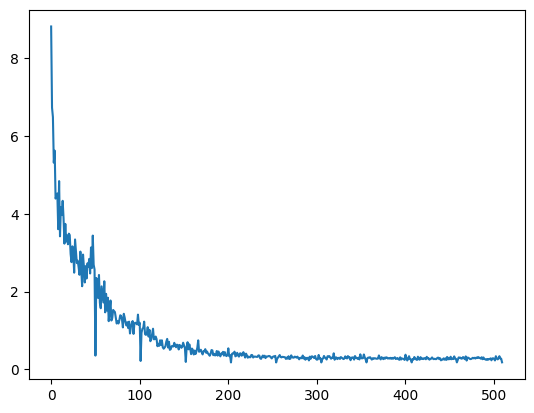

In [7]:
res['epoch_loss'].plot()

g:0, y:0 ==> size:2502
g:0, y:1 ==> size:318
g:1, y:0 ==> size:4031
g:1, y:1 ==> size:1832
g:0, y:0 ==> size:2502
g:0, y:1 ==> size:318
g:1, y:0 ==> size:4031
g:1, y:1 ==> size:1832
g:0, y:0 ==> size:2502
g:0, y:1 ==> size:318
g:1, y:0 ==> size:4031
g:1, y:1 ==> size:1832


In [35]:
N = 3
stages = get_curriculum_stages(data.y_train, data.s_train, 'data/adult/no_debias_sorted_idx_%d.json' % data.num_val, N=N)
# 从难到易
# stages.reverse()
# 并集
new_stages = []
for i in range(len(stages) - 1, 0, -1):
    new_stages.append(np.concatenate([stages[i], stages[i - 1]]))

new_stages.append(stages[0])
new_stages.reverse()
# base_epoch = 500
# epoch_list = [int(base_epoch / i) for i in range(1,N+1)]
# epoch_list.reverse()

g:0, y:0 ==> size:2502
g:0, y:1 ==> size:318
g:1, y:0 ==> size:4031
g:1, y:1 ==> size:1832
g:0, y:0 ==> size:2502
g:0, y:1 ==> size:318
g:1, y:0 ==> size:4031
g:1, y:1 ==> size:1832
g:0, y:0 ==> size:2502
g:0, y:1 ==> size:318
g:1, y:0 ==> size:4031
g:1, y:1 ==> size:1832


In [36]:
for stage in new_stages:
    print(stage.shape)

(8683,)
(17366,)
(17366,)


In [55]:
epoch_list = [40] * 2 + [300]
epoch_list

[40, 40, 300]

In [56]:
# CL test
clf_cl = AdversarialDebiasing(n_features, n_classes, n_groups, adversary_loss_weight=0.1,
                              scope_name='CL_Adversary_classifier', num_epochs=500,
                              batch_size=512, classifier_num_hidden_units=512, random_state=42, debias=False)
loss_lists, val_lists, train_infos, val_infos = [], [], [], []
for num_epoch, stage in zip(epoch_list, new_stages):
    # TODO: try set1 U set2
    print(len(stage))
    clf_cl.num_epochs = num_epoch
    x_train = data.x_train[stage, :]
    y_train = data.y_train[stage]
    s_train = data.s_train[stage]
    loss_list, val_list, train_info, val_info = \
        clf_cl.fit(x_train, y_train, s_train, early_stopping=True, validation_set=[data.x_val, data.y_val, data.s_val])
    loss_lists.append(loss_list)
    val_lists.append(val_list)
    train_infos.append(train_info)
    val_infos.append(val_info)

8683


Classifier Training Epoch:  57%|█████▊    | 23/40 [00:10<00:08,  2.09it/s, acc=0.965, loss=0.67]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  80%|████████  | 32/40 [00:15<00:04,  1.99it/s, acc=0.982, loss=0.431]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch: 100%|██████████| 40/40 [00:19<00:00,  2.08it/s, acc=0.953, loss=1.07]   


17366


Classifier Training Epoch:  18%|█▊        | 7/40 [00:09<00:36,  1.10s/it, acc=1, loss=0]          

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  25%|██▌       | 10/40 [00:12<00:32,  1.08s/it, acc=1, loss=0]         

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  32%|███▎      | 13/40 [00:16<00:30,  1.11s/it, acc=0.908, loss=2.05]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  40%|████      | 16/40 [00:19<00:27,  1.13s/it, acc=0.918, loss=1.39]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  48%|████▊     | 19/40 [00:23<00:23,  1.14s/it, acc=0.916, loss=1.41]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  55%|█████▌    | 22/40 [00:26<00:20,  1.12s/it, acc=0.951, loss=0.768]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  62%|██████▎   | 25/40 [00:29<00:18,  1.22s/it, acc=0.953, loss=0.837]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  65%|██████▌   | 26/40 [00:31<00:15,  1.09s/it, acc=1, loss=0]          

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  70%|███████   | 28/40 [00:33<00:15,  1.33s/it, acc=0.98, loss=0.604]   

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  72%|███████▎  | 29/40 [00:35<00:13,  1.21s/it, acc=0.998, loss=0.0239]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  78%|███████▊  | 31/40 [00:37<00:11,  1.26s/it, acc=0.969, loss=0.474] 

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  80%|████████  | 32/40 [00:38<00:09,  1.15s/it, acc=1, loss=0]         

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  85%|████████▌ | 34/40 [00:40<00:07,  1.19s/it, acc=0.986, loss=0.0554]

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  88%|████████▊ | 35/40 [00:42<00:05,  1.12s/it, acc=1, loss=0]         

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  92%|█████████▎| 37/40 [00:43<00:03,  1.24s/it, acc=0.966, loss=0.603] 

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  95%|█████████▌| 38/40 [00:45<00:02,  1.11s/it, acc=0.924, loss=1.5]   

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  98%|█████████▊| 39/40 [00:47<00:01,  1.14s/it, acc=1, loss=6.29e-9]    

EarlyStopping counter: 11 out of 10


Classifier Training Epoch: 100%|██████████| 40/40 [00:47<00:00,  1.18s/it, acc=0.966, loss=0.498] 


17366


Classifier Training Epoch:   1%|▏         | 4/300 [00:05<05:54,  1.20s/it, acc=1, loss=1.4e-9]     

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   3%|▎         | 9/300 [00:10<05:46,  1.19s/it, acc=0.91, loss=0.987]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   4%|▍         | 12/300 [00:14<05:31,  1.15s/it, acc=0.509, loss=5.28]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   5%|▍         | 14/300 [00:17<05:18,  1.11s/it, acc=0.594, loss=3.79]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   6%|▌         | 17/300 [00:20<05:03,  1.07s/it, acc=0.986, loss=0.0982] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   7%|▋         | 20/300 [00:24<05:12,  1.11s/it, acc=0.998, loss=0.0124] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   8%|▊         | 23/300 [00:27<05:32,  1.20s/it, acc=0.996, loss=0.0117] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:   8%|▊         | 25/300 [00:29<05:47,  1.26s/it, acc=0.754, loss=3.57]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:   9%|▊         | 26/300 [00:31<05:07,  1.12s/it, acc=0.764, loss=2.18] 

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:   9%|▉         | 28/300 [00:33<05:56,  1.31s/it, acc=0.814, loss=2.28]   

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  10%|▉         | 29/300 [00:34<05:26,  1.21s/it, acc=0.945, loss=0.461]

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  10%|█         | 31/300 [00:36<06:03,  1.35s/it, acc=0.93, loss=1.08]   

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  11%|█         | 32/300 [00:39<05:51,  1.31s/it, acc=1, loss=4.89e-9]  

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  11%|█▏        | 34/300 [00:41<06:05,  1.37s/it, acc=0.91, loss=1.04]    

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  12%|█▏        | 36/300 [00:44<05:32,  1.26s/it, acc=0.592, loss=2.86]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  13%|█▎        | 39/300 [00:48<05:14,  1.20s/it, acc=0.996, loss=0.0179] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  14%|█▍        | 42/300 [00:52<06:19,  1.47s/it, acc=0.998, loss=0.00885]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  15%|█▌        | 45/300 [00:57<06:22,  1.50s/it, acc=0.998, loss=0.00911]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  16%|█▌        | 48/300 [01:01<05:41,  1.35s/it, acc=0.998, loss=0.00798]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  17%|█▋        | 50/300 [01:03<06:01,  1.45s/it, acc=0.508, loss=11.5]   

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  17%|█▋        | 51/300 [01:04<05:22,  1.30s/it, acc=0.762, loss=1.91] 

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  18%|█▊        | 53/300 [01:07<05:56,  1.44s/it, acc=0.82, loss=2.46]    

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  18%|█▊        | 54/300 [01:09<05:18,  1.30s/it, acc=1, loss=9.87e-8]  

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  19%|█▊        | 56/300 [01:11<05:51,  1.44s/it, acc=0.936, loss=0.745]  

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  19%|█▉        | 57/300 [01:13<05:12,  1.29s/it, acc=1, loss=9.64e-8]  

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  20%|█▉        | 59/300 [01:14<05:35,  1.39s/it, acc=0.932, loss=0.759]  

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  20%|██        | 60/300 [01:16<05:02,  1.26s/it, acc=0.0449, loss=18.7]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  20%|██        | 61/300 [01:18<05:10,  1.30s/it, acc=0.566, loss=2.54]   

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  21%|██        | 63/300 [01:20<04:56,  1.25s/it, acc=0.0488, loss=17.5]

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  21%|██▏       | 64/300 [01:22<04:47,  1.22s/it, acc=0.561, loss=2.44]   

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  22%|██▏       | 67/300 [01:25<04:18,  1.11s/it, acc=0.654, loss=1.82]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  23%|██▎       | 69/300 [01:26<04:09,  1.08s/it, acc=0.234, loss=4.42] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  23%|██▎       | 70/300 [01:28<04:13,  1.10s/it, acc=0.998, loss=0.00402]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  24%|██▍       | 72/300 [01:30<04:00,  1.06s/it, acc=0.729, loss=0.991]  

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  24%|██▍       | 73/300 [01:31<04:03,  1.07s/it, acc=0.998, loss=0.0057] 

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  25%|██▌       | 75/300 [01:33<04:23,  1.17s/it, acc=0.652, loss=4.62]   

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  25%|██▌       | 76/300 [01:35<03:56,  1.06s/it, acc=1, loss=5.12e-8]  

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  26%|██▌       | 78/300 [01:37<04:32,  1.23s/it, acc=0.516, loss=10.1]   

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  26%|██▋       | 79/300 [01:38<03:58,  1.08s/it, acc=0.998, loss=0.00294]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  27%|██▋       | 81/300 [01:40<04:20,  1.19s/it, acc=0.83, loss=2.49]    

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  27%|██▋       | 82/300 [01:41<03:50,  1.06s/it, acc=1, loss=6.98e-10] 

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  28%|██▊       | 84/300 [01:43<04:18,  1.20s/it, acc=0.464, loss=3.17]   

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  28%|██▊       | 85/300 [01:45<03:53,  1.08s/it, acc=1, loss=1.4e-9]    

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  29%|██▉       | 87/300 [01:47<04:11,  1.18s/it, acc=0.953, loss=0.72]   

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  30%|██▉       | 89/300 [01:50<03:50,  1.09s/it, acc=0.643, loss=1.84]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  31%|███       | 92/300 [01:52<03:34,  1.03s/it, acc=0.635, loss=1.69]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  32%|███▏      | 95/300 [01:56<03:26,  1.01s/it, acc=0.998, loss=0.00633]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  33%|███▎      | 98/300 [01:58<03:24,  1.01s/it, acc=0.998, loss=0.00566]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  33%|███▎      | 100/300 [02:00<03:42,  1.11s/it, acc=0.699, loss=4.02]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  34%|███▎      | 101/300 [02:02<03:17,  1.01it/s, acc=0.783, loss=1.35]  

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  34%|███▍      | 103/300 [02:03<03:40,  1.12s/it, acc=0.742, loss=2.86]   

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  35%|███▍      | 104/300 [02:05<03:17,  1.01s/it, acc=0.807, loss=1.19] 

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  35%|███▌      | 106/300 [02:06<03:35,  1.11s/it, acc=0.822, loss=1.92]   

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  36%|███▌      | 107/300 [02:08<03:20,  1.04s/it, acc=1, loss=2.56e-8]   

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  36%|███▋      | 109/300 [02:10<03:37,  1.14s/it, acc=0.91, loss=0.697]   

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  37%|███▋      | 110/300 [02:11<03:15,  1.03s/it, acc=1, loss=6.98e-10] 

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  37%|███▋      | 112/300 [02:13<03:30,  1.12s/it, acc=0.506, loss=2.54]   

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  38%|███▊      | 113/300 [02:14<03:08,  1.01s/it, acc=1, loss=9.31e-10]  

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  38%|███▊      | 114/300 [02:16<03:15,  1.05s/it, acc=0.648, loss=1.66]   

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  39%|███▉      | 117/300 [02:19<03:10,  1.04s/it, acc=0.99, loss=0.0283]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  40%|████      | 120/300 [02:22<03:05,  1.03s/it, acc=0.998, loss=0.00334]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  41%|████      | 122/300 [02:24<02:56,  1.01it/s, acc=0.488, loss=1.74]   

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  41%|████      | 123/300 [02:25<03:02,  1.03s/it, acc=1, loss=0.000414]   

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  42%|████▏     | 125/300 [02:27<03:17,  1.13s/it, acc=0.717, loss=2.79]   

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  42%|████▏     | 126/300 [02:28<02:55,  1.01s/it, acc=1, loss=5.02e-5]  

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  43%|████▎     | 128/300 [02:30<03:09,  1.10s/it, acc=0.592, loss=5.89]   

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  43%|████▎     | 129/300 [02:32<02:51,  1.00s/it, acc=1, loss=6.98e-10] 

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  44%|████▎     | 131/300 [02:34<03:41,  1.31s/it, acc=0.922, loss=0.715]  

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  44%|████▍     | 132/300 [02:35<03:17,  1.17s/it, acc=1, loss=4.21e-8]  

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  45%|████▍     | 134/300 [02:37<03:31,  1.28s/it, acc=0.912, loss=0.8]    

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  45%|████▌     | 135/300 [02:39<03:10,  1.16s/it, acc=1, loss=6.98e-10] 

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  46%|████▌     | 137/300 [02:41<03:26,  1.26s/it, acc=0.536, loss=2.13]   

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  46%|████▋     | 139/300 [02:44<03:12,  1.20s/it, acc=0.74, loss=1]       

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  47%|████▋     | 141/300 [02:46<03:00,  1.13s/it, acc=0.279, loss=3.13] 

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  47%|████▋     | 142/300 [02:48<03:18,  1.26s/it, acc=1, loss=0.00141]    

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  48%|████▊     | 144/300 [02:50<03:06,  1.19s/it, acc=0.783, loss=0.618]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  48%|████▊     | 145/300 [02:52<03:14,  1.26s/it, acc=1, loss=0.00186]   

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  49%|████▉     | 148/300 [02:55<02:52,  1.13s/it, acc=1, loss=0.00184]    

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  50%|█████     | 150/300 [02:56<02:55,  1.17s/it, acc=0.691, loss=3.43]   

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  50%|█████     | 151/300 [02:58<02:34,  1.04s/it, acc=1, loss=3.83e-5]  

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  51%|█████     | 153/300 [02:59<02:38,  1.08s/it, acc=0.543, loss=8.63]   

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  51%|█████▏    | 154/300 [03:01<02:25,  1.00it/s, acc=1, loss=8.56e-6]  

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  52%|█████▏    | 156/300 [03:02<02:37,  1.09s/it, acc=0.607, loss=4.93]   

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  52%|█████▏    | 157/300 [03:04<02:20,  1.01it/s, acc=1, loss=2.86e-8]   

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  53%|█████▎    | 159/300 [03:05<02:34,  1.10s/it, acc=0.904, loss=0.772]  

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  53%|█████▎    | 160/300 [03:07<02:18,  1.01it/s, acc=1, loss=0]        

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  54%|█████▍    | 162/300 [03:08<02:29,  1.08s/it, acc=0.955, loss=0.31]   

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  54%|█████▍    | 163/300 [03:10<02:14,  1.02it/s, acc=0.0508, loss=6.75]

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  55%|█████▍    | 164/300 [03:12<02:19,  1.02s/it, acc=0.564, loss=1.85]   

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  56%|█████▌    | 167/300 [03:14<02:16,  1.03s/it, acc=0.988, loss=0.0249] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  57%|█████▋    | 170/300 [03:18<02:15,  1.04s/it, acc=0.998, loss=0.00237]

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  57%|█████▋    | 172/300 [03:19<02:09,  1.02s/it, acc=0.52, loss=1.42]    

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  58%|█████▊    | 173/300 [03:21<02:12,  1.04s/it, acc=1, loss=0.00162]   

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  58%|█████▊    | 175/300 [03:22<02:20,  1.12s/it, acc=0.682, loss=3.65]   

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  59%|█████▊    | 176/300 [03:24<02:05,  1.01s/it, acc=1, loss=1.4e-6]   

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  59%|█████▉    | 178/300 [03:26<02:19,  1.14s/it, acc=0.814, loss=2.1]  

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  60%|█████▉    | 179/300 [03:27<02:07,  1.05s/it, acc=0.85, loss=0.83]  

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  60%|██████    | 181/300 [03:29<02:15,  1.14s/it, acc=0.828, loss=1.74]   

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  61%|██████    | 182/300 [03:30<01:59,  1.02s/it, acc=1, loss=1.65e-8]   

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  61%|██████▏   | 184/300 [03:32<02:09,  1.11s/it, acc=0.912, loss=0.779]  

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  62%|██████▏   | 185/300 [03:34<01:55,  1.01s/it, acc=1, loss=1.63e-9]  

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  62%|██████▏   | 187/300 [03:35<02:06,  1.12s/it, acc=0.598, loss=1.68]   

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  63%|██████▎   | 188/300 [03:37<01:52,  1.01s/it, acc=0.0527, loss=6.4] 

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  63%|██████▎   | 189/300 [03:38<01:58,  1.07s/it, acc=0.699, loss=1.18]   

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  64%|██████▍   | 192/300 [03:41<01:59,  1.11s/it, acc=0.869, loss=0.458]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  65%|██████▍   | 194/300 [03:43<01:48,  1.02s/it, acc=0.354, loss=3.39]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  65%|██████▌   | 195/300 [03:45<01:56,  1.11s/it, acc=0.998, loss=0.00323]

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  66%|██████▌   | 198/300 [03:48<01:53,  1.11s/it, acc=1, loss=0.00221]    

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  67%|██████▋   | 200/300 [03:50<01:56,  1.17s/it, acc=0.736, loss=2.79]   

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  67%|██████▋   | 201/300 [03:51<01:43,  1.04s/it, acc=1, loss=4.51e-5]  

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  68%|██████▊   | 203/300 [03:53<01:46,  1.10s/it, acc=0.543, loss=7.58] 

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  68%|██████▊   | 204/300 [03:54<01:37,  1.02s/it, acc=1, loss=4.89e-7]  

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  69%|██████▊   | 206/300 [03:56<01:55,  1.22s/it, acc=0.924, loss=0.673]  

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  69%|██████▉   | 207/300 [03:58<01:43,  1.11s/it, acc=1, loss=2.46e-7]   

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  70%|██████▉   | 209/300 [03:59<01:47,  1.18s/it, acc=0.924, loss=0.694] 

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  70%|███████   | 210/300 [04:01<01:34,  1.06s/it, acc=1, loss=4.66e-10] 

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  71%|███████   | 212/300 [04:03<01:38,  1.12s/it, acc=0.939, loss=0.555]  

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  71%|███████   | 213/300 [04:04<01:26,  1.00it/s, acc=0.0449, loss=12.2] 

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  71%|███████▏  | 214/300 [04:06<01:29,  1.04s/it, acc=0.801, loss=0.64]   

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  72%|███████▏  | 217/300 [04:09<01:27,  1.06s/it, acc=0.881, loss=0.416]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  73%|███████▎  | 219/300 [04:10<01:22,  1.02s/it, acc=0.561, loss=1.16]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  74%|███████▍  | 222/300 [04:14<01:26,  1.11s/it, acc=0.951, loss=0.13]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  74%|███████▍  | 223/300 [04:16<01:33,  1.22s/it, acc=1, loss=9.57e-6]   

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  75%|███████▌  | 225/300 [04:18<01:47,  1.43s/it, acc=0.535, loss=7.57]   

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  75%|███████▌  | 226/300 [04:20<01:36,  1.31s/it, acc=0.828, loss=0.864]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  76%|███████▌  | 228/300 [04:22<01:34,  1.32s/it, acc=0.553, loss=7.55]  

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  76%|███████▋  | 229/300 [04:23<01:21,  1.15s/it, acc=0.83, loss=0.774] 

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  77%|███████▋  | 231/300 [04:25<01:25,  1.23s/it, acc=0.924, loss=0.394] 

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  77%|███████▋  | 232/300 [04:27<01:17,  1.13s/it, acc=1, loss=5.27e-7]   

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  78%|███████▊  | 234/300 [04:29<01:19,  1.20s/it, acc=0.914, loss=0.626]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  78%|███████▊  | 235/300 [04:30<01:10,  1.08s/it, acc=1, loss=9.31e-10] 

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  79%|███████▉  | 237/300 [04:32<01:13,  1.17s/it, acc=0.628, loss=1.43]  

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  79%|███████▉  | 238/300 [04:33<01:05,  1.05s/it, acc=0.0664, loss=5.68] 

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  80%|███████▉  | 239/300 [04:35<01:08,  1.11s/it, acc=0.902, loss=0.351]  

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  82%|████████▏ | 245/300 [04:41<01:00,  1.10s/it, acc=0.988, loss=0.0309] 

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  82%|████████▏ | 247/300 [04:43<00:53,  1.00s/it, acc=0.775, loss=0.55]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  83%|████████▎ | 250/300 [04:46<00:58,  1.18s/it, acc=0.689, loss=3.16]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  84%|████████▎ | 251/300 [04:48<00:53,  1.09s/it, acc=1, loss=1.38e-6]  

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  84%|████████▍ | 253/300 [04:50<00:57,  1.21s/it, acc=0.537, loss=8.38]  

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  85%|████████▍ | 254/300 [04:51<00:49,  1.08s/it, acc=0.844, loss=0.716] 

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  85%|████████▌ | 256/300 [04:53<00:50,  1.14s/it, acc=0.9, loss=0.71]    

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  86%|████████▌ | 257/300 [04:54<00:44,  1.03s/it, acc=1, loss=5.84e-8]  

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  86%|████████▋ | 259/300 [04:56<00:46,  1.13s/it, acc=0.914, loss=0.736] 

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  87%|████████▋ | 260/300 [04:58<00:41,  1.05s/it, acc=1, loss=0]         

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  87%|████████▋ | 262/300 [04:59<00:42,  1.13s/it, acc=0.677, loss=1.25] 

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  88%|████████▊ | 263/300 [05:01<00:39,  1.07s/it, acc=0.256, loss=3.29]  

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  88%|████████▊ | 264/300 [05:03<00:40,  1.14s/it, acc=0.698, loss=1.15]   

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  89%|████████▊ | 266/300 [05:04<00:37,  1.12s/it, acc=0.377, loss=3.01]  

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  89%|████████▉ | 267/300 [05:06<00:37,  1.15s/it, acc=0.908, loss=0.309]  

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  90%|████████▉ | 269/300 [05:08<00:33,  1.07s/it, acc=0.564, loss=1.07]  

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  91%|█████████ | 272/300 [05:11<00:29,  1.04s/it, acc=0.773, loss=0.522]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  92%|█████████▏| 275/300 [05:14<00:28,  1.13s/it, acc=0.672, loss=3.14]   

EarlyStopping counter: 1 out of 10


Classifier Training Epoch:  92%|█████████▏| 276/300 [05:16<00:24,  1.02s/it, acc=1, loss=5e-5]     

EarlyStopping counter: 2 out of 10


Classifier Training Epoch:  93%|█████████▎| 278/300 [05:17<00:24,  1.13s/it, acc=0.5, loss=8.13]   

EarlyStopping counter: 3 out of 10


Classifier Training Epoch:  93%|█████████▎| 279/300 [05:19<00:21,  1.02s/it, acc=0.852, loss=0.657]

EarlyStopping counter: 4 out of 10


Classifier Training Epoch:  94%|█████████▎| 281/300 [05:20<00:20,  1.09s/it, acc=0.598, loss=4.26] 

EarlyStopping counter: 5 out of 10


Classifier Training Epoch:  94%|█████████▍| 282/300 [05:22<00:17,  1.01it/s, acc=1, loss=6.87e-8]  

EarlyStopping counter: 6 out of 10


Classifier Training Epoch:  95%|█████████▍| 284/300 [05:23<00:17,  1.11s/it, acc=0.918, loss=0.646] 

EarlyStopping counter: 7 out of 10


Classifier Training Epoch:  95%|█████████▌| 285/300 [05:25<00:15,  1.02s/it, acc=1, loss=2.33e-10]  

EarlyStopping counter: 8 out of 10


Classifier Training Epoch:  96%|█████████▌| 287/300 [05:27<00:14,  1.13s/it, acc=0.941, loss=0.531]

EarlyStopping counter: 9 out of 10


Classifier Training Epoch:  96%|█████████▌| 288/300 [05:28<00:12,  1.02s/it, acc=1, loss=4.66e-10]  

EarlyStopping counter: 10 out of 10


Classifier Training Epoch:  97%|█████████▋| 290/300 [05:30<00:10,  1.08s/it, acc=0.698, loss=1.13]  

EarlyStopping counter: 11 out of 10


Classifier Training Epoch:  97%|█████████▋| 291/300 [05:31<00:08,  1.04it/s, acc=0.0488, loss=10.6] 

EarlyStopping counter: 12 out of 10


Classifier Training Epoch:  97%|█████████▋| 292/300 [05:32<00:08,  1.01s/it, acc=0.807, loss=0.717]  

EarlyStopping counter: 13 out of 10


Classifier Training Epoch:  98%|█████████▊| 294/300 [05:34<00:05,  1.06it/s, acc=0.57, loss=1.05]   

EarlyStopping counter: 14 out of 10


Classifier Training Epoch:  99%|█████████▉| 297/300 [05:37<00:02,  1.00it/s, acc=0.803, loss=0.477]  

EarlyStopping counter: 1 out of 10


Classifier Training Epoch: 100%|██████████| 300/300 [05:40<00:00,  1.13s/it, acc=0.538, loss=5.06]   

EarlyStopping counter: 1 out of 10


In [57]:
print("========== after train(with debiasing) ==========")
pred_label_train = clf_cl.predict(data.x_train)
train_res = train_evaluator(data.y_train, pred_label_train, no_train=False)

pred_label_test = clf_cl.predict(data.x_test)
test_res = test_evaluator(data.y_test, pred_label_test, no_train=False)

========== after train(with debiasing) ==========
========== Results on train ==========
Grp. 0 - #instance: 8460; #pos. pred: 635; Acc.: 0.934161
Grp. 1 - #instance: 17589; #pos. pred: 3766; Acc.: 0.804878
Overall acc.: 0.846866; Demographic parity: 0.139052; Equal opportunity: -0.010495; Average odds difference: 0.020298
========== Results on test ==========
Grp. 0 - #instance: 4147; #pos. pred: 286; Acc.: 0.911502
Grp. 1 - #instance: 8514; #pos. pred: 1728; Acc.: 0.766855
Overall acc.: 0.814233; Demographic parity: 0.133994; Equal opportunity: 0.036709; Average odds difference: 0.026567


In [58]:
def get_df(infos, loss_lists):
    df_list = []
    N = len(infos)
    for i in range(N):
        tmp = pd.DataFrame(infos[i])
        tmp['loss'] = loss_lists[i]
        df_list.append(tmp)
    res = pd.concat(df_list, axis=0)
    res = res.reset_index()
    return res

In [59]:
df = get_df(train_infos, loss_lists)
df.describe()

,index,overall_acc,dp,eop,average_odds_difference,grp_0_acc,grp_1_acc,loss
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,86.618852,0.832222,0.148506,0.050994,0.045884,0.921227,0.789412,3.877428e+00
std,63.675992,0.060955,0.035184,0.046137,0.032207,0.026436,0.077997,4.348199e+00
min,0.000000,0.780951,0.079515,-0.039993,0.007039,0.857092,0.726761,4.656612e-10
25%,23.750000,0.800616,0.118216,0.027066,0.027447,0.906383,0.749318,9.229869e-01
50%,81.500000,0.811010,0.145471,0.041994,0.038816,0.914805,0.760916,2.045583e+00
75%,142.250000,0.818395,0.170068,0.061340,0.053232,0.919371,0.770275,5.958477e+00
max,203.000000,0.988944,0.227178,0.317105,0.297403,0.990426,0.988231,3.288533e+01


<AxesSubplot:>

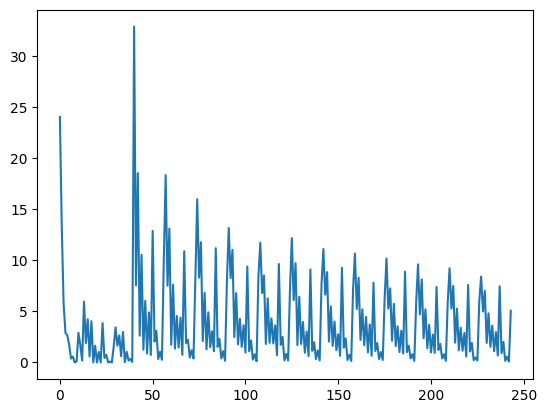

In [60]:
df['loss'][:].plot()

In [43]:
val_df = get_df(val_infos, val_lists)

<AxesSubplot:>

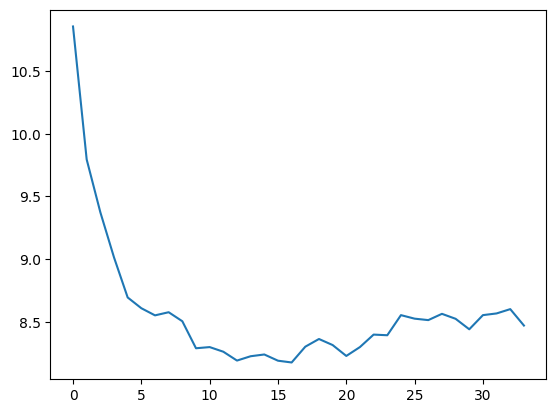

In [45]:
val_df['loss'][:].plot()

In [16]:
# CL test
clf_cl2 = AdversarialDebiasing(n_features, n_classes, n_groups, adversary_loss_weight=0.1,
                              scope_name='CL_Adversary_classifier', num_epochs=250,
                              batch_size=512, classifier_num_hidden_units=512, random_state=42, debias=True)
stages = get_curriculum_stages('data/adult/sorted_idx_%d.json' % data.num_val, N=2)
loss_lists2, val_lists2, train_infos2, val_infos2 = [], [], [], []
for stage in stages:
    # TODO: try set1 U set2
    print(len(stage))
    x_train = data.x_train[stage, :]
    y_train = data.y_train[stage]
    s_train = data.s_train[stage]
    loss_list, val_list, train_info, val_info = \
        clf_cl.fit(x_train, y_train, s_train, early_stopping=True, validation_set=[data.x_val, data.y_val, data.s_val])
    loss_lists2.append(loss_list)
    val_lists2.append(val_list)
    train_infos2.append(train_info)
    val_infos2.append(val_info)

TypeError: get_curriculum_stages() missing 2 required positional arguments: 's' and 'idx_path'